# **Self Organizing Maps in Anomaly Detection for Chemical Engineers**



In [2]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'hotelling'

In [4]:
# load data
data = pd.read_csv('../0_data/som_studies/normal_operation_compressor.csv')
data.head()

,FCV-501D_ACT,PIT-501D,PIT-516D,PIT-517D,PIT-518D,PIT-519D,PIT-521D,PIT-523D,PIT-529D,PIT-530D,...,XT-506D-Y,XT-507D-X,XT-507D-Y,XT-508D-X,XT-508D-Y,ZT-503D-A,ZT-503D-B,ZT-504D-B,ZY-503D,prob
0,45.493362,40.756344,20.902378,17.372452,2.038123,2.224318,0.992395,3.347148,4.506837,5.060158,...,11.907991,8.478170,9.437210,6.986217,10.068040,26.280346,26.706827,0.071125,26.317259,0.270024
1,44.839832,40.872658,20.552832,17.094263,2.000226,2.184674,0.992454,3.304876,4.491679,5.077046,...,12.062502,8.429724,9.592444,7.121663,10.251029,26.943079,27.212057,0.071125,26.810747,0.269941
2,47.116543,40.626442,21.869236,18.119350,2.124781,2.319191,0.991775,3.460335,4.479621,5.148957,...,11.878652,8.444281,9.146814,6.753309,9.941579,24.002470,24.779950,0.074429,24.078333,0.272405
3,47.255856,40.635143,21.998035,18.240286,2.147179,2.343245,0.991836,3.480938,4.429873,5.161973,...,12.130912,8.444281,9.146688,6.811512,10.018728,23.825638,24.554980,0.075468,23.965624,0.273153
4,47.097378,40.642517,21.893854,18.163750,2.138274,2.335860,0.991764,3.471886,4.563508,5.125422,...,12.169901,8.458838,9.292214,6.772871,10.038246,23.996452,24.678562,0.071191,24.140740,0.271883


In [5]:
# feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data.drop(['prob'], axis=1))

x_sc = scaler.transform(data.drop(['prob'], axis=1))

In [17]:
# create the object and fit the mode
N=10
som = MiniSom(x=N, y=N, input_len=x_sc.shape[1], sigma=1, learning_rate=0.5)
som.random_weights_init(x_sc)
som.train_random(x_sc, num_iteration=100)

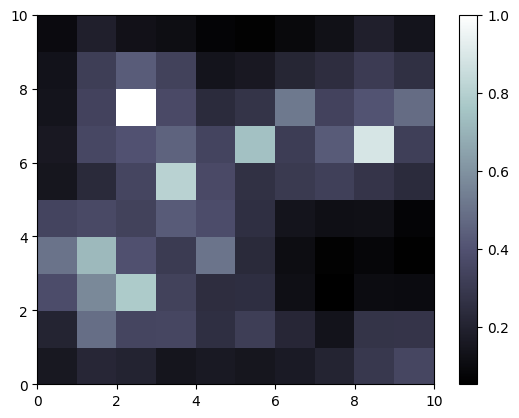

In [18]:
# visualize the results
bone()
pcolor(som.distance_map().T)
colorbar()

In [127]:
# calculating the distance map and finding those nodes with
# highest distance
distances = som.distance_map()
pot_anom_nodes = np.where(distances > 0.3)

In [128]:
# get the potential anomalies arrays
dist = []
mappings = som.win_map(x_sc)

In [129]:
anom_list = []
for i, j in zip(pot_anom_nodes[0], pot_anom_nodes[1]):
    
    # get the list of dots mapped to the selected nodes
    anom_list.append(mappings[(i, j)])

# concatenate all arrays in a single
potential_anomalies = np.concatenate(anom_list, axis=0)

In [130]:
# extract the dataframe with the potential anomalies
potential_anomalies = pd.DataFrame(potential_anomalies, columns=data.drop(['prob'], axis=1).columns)
potential_anomalies = potential_anomalies.round(6)
potential_anomalies['key'] = potential_anomalies.apply(lambda row: ''.join(map(str, row)), axis=1)
potential_anomalies.head()

,FCV-501D_ACT,PIT-501D,PIT-516D,PIT-517D,PIT-518D,PIT-519D,PIT-521D,PIT-523D,PIT-529D,PIT-530D,...,XT-506D-Y,XT-507D-X,XT-507D-Y,XT-508D-X,XT-508D-Y,ZT-503D-A,ZT-503D-B,ZT-504D-B,ZY-503D,key
0,0.896339,0.913075,0.207380,0.850506,0.910035,0.914582,0.630295,0.849682,0.719932,0.769344,...,0.212843,0.095963,0.112889,0.053201,0.078930,0.121474,0.122584,0.769937,0.121857,0.8963390.9130750.207380.8505060.9100350.91458...
1,0.904341,0.912355,0.213904,0.862476,0.928128,0.928001,0.644010,0.864410,0.810728,0.762717,...,0.190365,0.075422,0.125019,0.052542,0.052505,0.107686,0.114585,0.701691,0.109148,0.9043410.9123550.2139040.8624760.9281280.9280...
2,0.902955,0.912606,0.212332,0.859434,0.922387,0.921959,0.641157,0.858398,0.748102,0.709713,...,0.213885,0.093298,0.110560,0.053201,0.088671,0.114864,0.119040,0.705139,0.115982,0.9029550.9126060.2123320.8594340.9223870.9219...
3,0.904131,0.912558,0.213130,0.860752,0.919276,0.922317,0.651230,0.858838,0.736702,0.775734,...,0.205861,0.091945,0.111743,0.043692,0.079603,0.113811,0.117698,0.795590,0.116317,0.9041310.9125580.213130.8607520.9192760.92231...
4,0.903754,0.912732,0.212998,0.860528,0.916993,0.922422,0.636908,0.858604,0.851263,0.773494,...,0.202340,0.056232,0.159740,0.044360,0.090673,0.116192,0.119453,0.737728,0.119022,0.9037540.9127320.2129980.8605280.9169930.9224...


In [131]:
# get the scaled data as a dataframe and create the keys
x = pd.DataFrame(x_sc, columns=data.drop(['prob'], axis=1).columns)
x = x.round(6)
x['key'] = x.apply(lambda row: ''.join(map(str, row)), axis=1)
x.head()

,FCV-501D_ACT,PIT-501D,PIT-516D,PIT-517D,PIT-518D,PIT-519D,PIT-521D,PIT-523D,PIT-529D,PIT-530D,...,XT-506D-Y,XT-507D-X,XT-507D-Y,XT-508D-X,XT-508D-Y,ZT-503D-A,ZT-503D-B,ZT-504D-B,ZY-503D,key
0,0.810256,0.931797,0.133404,0.698835,0.672326,0.682663,0.233704,0.683201,0.747717,0.737109,...,0.033300,0.074090,0.291782,0.150237,0.145763,0.266319,0.259483,0.635557,0.264417,0.8102560.9317970.1334040.6988350.6723260.6826...
1,0.798596,0.934487,0.123786,0.679578,0.650798,0.661273,0.236057,0.663030,0.732284,0.752826,...,0.055445,0.054882,0.345569,0.176823,0.182422,0.283880,0.272935,0.635557,0.277513,0.7985960.9344870.1237860.6795780.6507980.6612...
2,0.839215,0.928793,0.160009,0.750537,0.721552,0.733851,0.208996,0.737211,0.720008,0.819754,...,0.029095,0.060654,0.191162,0.104521,0.120429,0.205962,0.208180,0.666449,0.204997,0.8392150.9287930.1600090.7505370.7215520.7338...
3,0.841700,0.928995,0.163553,0.758908,0.734276,0.746829,0.211434,0.747043,0.669359,0.831869,...,0.065250,0.060654,0.191119,0.115945,0.135885,0.201277,0.202190,0.676163,0.202006,0.84170.9289950.1635530.7589080.7342760.746829...
4,0.838873,0.929165,0.160686,0.753610,0.729217,0.742844,0.208578,0.742723,0.805414,0.797850,...,0.070838,0.066425,0.241542,0.108360,0.139795,0.205803,0.205481,0.636165,0.206653,0.8388730.9291650.1606860.753610.7292170.74284...


In [132]:
# find the data which correspond to anomalies
anom_list = []
for key in potential_anomalies['key'].values:
    anom_list.append(np.where(x['key'].values == key)[0][0])